<a href="https://colab.research.google.com/github/deepenmi/tutorials/blob/master/LinearRegression_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch

In [0]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)




In [0]:
def forward(x):
  y = w*x + b
  return y 

In [4]:
x = torch.tensor([[4],[7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

# Linear Class

In [0]:
import torch
from torch.nn import Linear


In [6]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [7]:
x = torch.tensor([[2.0],[3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


# Custom Modules

In [0]:
import torch
import torch.nn as nn 
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self,x):
    pred = self.linear(x)
    return pred

In [0]:
torch.manual_seed(1)
model = LR(1,1)


In [10]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [11]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


# Creating Datasets

Text(0.5, 0, 'x')

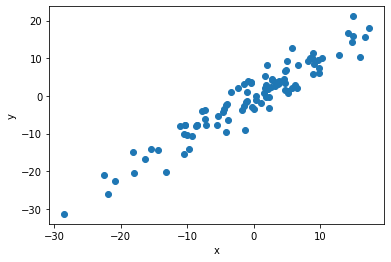

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

x = torch.randn(100, 1)*10
y = x + 3*torch.randn(100,1)
plt.plot(x.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')


In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self,x):
    pred = self.linear(x)
    return pred

In [3]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 +b1
  plt.plot(x1, y1, 'r')
  plt.scatter(x,y)
  plt.show()

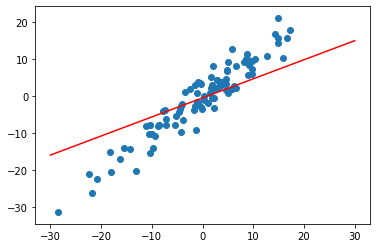

In [6]:
plot_fit('Inital Model')

# Loss Function


In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [12]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 8.532516479492188
epoch: 1 loss: 8.532431602478027
epoch: 2 loss: 8.532349586486816
epoch: 3 loss: 8.532271385192871
epoch: 4 loss: 8.532196998596191
epoch: 5 loss: 8.532124519348145
epoch: 6 loss: 8.532055854797363
epoch: 7 loss: 8.531989097595215
epoch: 8 loss: 8.531925201416016
epoch: 9 loss: 8.53186321258545
epoch: 10 loss: 8.531804084777832
epoch: 11 loss: 8.531746864318848
epoch: 12 loss: 8.531693458557129
epoch: 13 loss: 8.531641006469727
epoch: 14 loss: 8.531591415405273
epoch: 15 loss: 8.531542778015137
epoch: 16 loss: 8.53149700164795
epoch: 17 loss: 8.531452178955078
epoch: 18 loss: 8.53140926361084
epoch: 19 loss: 8.531368255615234
epoch: 20 loss: 8.531329154968262
epoch: 21 loss: 8.531291007995605
epoch: 22 loss: 8.531254768371582
epoch: 23 loss: 8.531219482421875
epoch: 24 loss: 8.5311861038208
epoch: 25 loss: 8.531153678894043
epoch: 26 loss: 8.531123161315918
epoch: 27 loss: 8.53109359741211
epoch: 28 loss: 8.531064987182617
epoch: 29 loss: 8.531037330627

Text(0.5, 0, 'epoch')

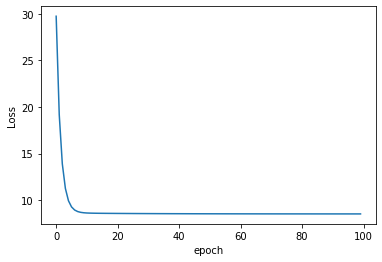

In [9]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

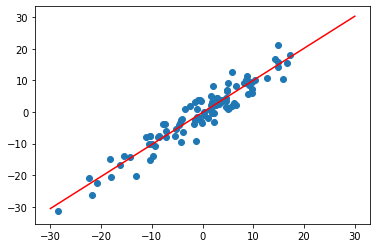

In [10]:
plot_fit("Trained_Model")